In [32]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [33]:
tol = 1e-6
col = ['r', 'b', 'g', 'c', 'm', 'k'] 
A = 1
L = 4
xshoot = np.linspace(-L, L, 81)

In [34]:
def shoot2(y, x, epsilon):
    return [y[1], (x**2 - epsilon) * y[0]]

[0.1, 1.0000004758127032, 3.0000143040902927, 5.000195883680134, 7.001630209852001, 9.009091757703555]
6
[[2.56183728e-04 1.45464943e-03 5.66850438e-03 1.74888359e-02
  4.54186757e-02]
 [3.76941341e-04 2.08382040e-03 7.88887258e-03 2.35797308e-02
  5.90957854e-02]
 [5.51715411e-04 2.96908204e-03 1.09182922e-02 3.16106597e-02
  7.64372043e-02]
 [8.01216856e-04 4.19597703e-03 1.49822214e-02 4.19964160e-02
  9.79253911e-02]
 [1.15311773e-03 5.87372070e-03 2.03519886e-02 5.51929337e-02
  1.23987612e-01]
 [1.64382865e-03 8.13910263e-03 2.73454572e-02 7.16775579e-02
  1.54932483e-01]
 [2.32056133e-03 1.11602386e-02 3.63245923e-02 9.19203681e-02
  1.90875692e-01]
 [3.24364690e-03 1.51397599e-02 4.76887129e-02 1.16345432e-01
  2.31657975e-01]
 [4.48904980e-03 2.03169168e-02 6.18621984e-02 1.45281713e-01
  2.76760901e-01]
 [6.15097686e-03 2.69679639e-02 7.92755339e-02 1.78904511e-01
  3.25228569e-01]
 [8.34443378e-03 3.54041083e-02 1.00338842e-01 2.17169759e-01
  3.75605710e-01]
 [1.12075293e-0

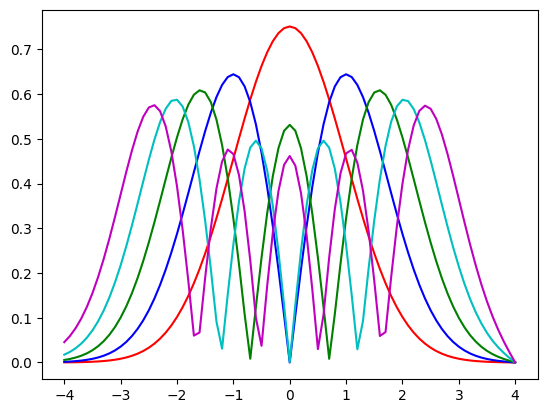

In [48]:
epsilon_list = [0.1]
epsilon_start = epsilon_list[0]
eigenfunction_list = []
for modes in range(1, 6): 
    epsilon = epsilon_start 
    depsilon = 0.1 
    for _ in range(1000): 
        y0 = [A, np.sqrt(L**2 - epsilon)]
        y = odeint(shoot2, y0, xshoot, args=(epsilon,))
        if abs(y[-1, 0] - 0) < tol:
            epsilon_list.append(epsilon) 
            break 
        if (-1) ** (modes + 1) * y[-1, 0] > 0:
            epsilon += depsilon
        else:
            epsilon -= depsilon / 2
            depsilon /= 2

    epsilon_start = epsilon + 0.1 

    norm = np.trapezoid(abs(y[:, 0]) * abs(y[:, 0]), xshoot)
    eigenfunction_list.append(abs(y[:, 0]) / np.sqrt(norm))
    
    plt.plot(xshoot, eigenfunction_list[modes - 1], col[modes - 1])
eigenfunction_matrix = np.column_stack(eigenfunction_list)
print(epsilon_list)
print(np.size(epsilon_list))
print(eigenfunction_matrix)
rows, columns = eigenfunction_matrix.shape
print(f"Number of rows: {rows}")
print(f"Number of columns: {columns}")

In [53]:
A1 = epsilon_list[-5:]
A2 = eigenfunction_matrix
print(A1)
print(A2)

[1.0000004758127032, 3.0000143040902927, 5.000195883680134, 7.001630209852001, 9.009091757703555]
[[2.56183728e-04 1.45464943e-03 5.66850438e-03 1.74888359e-02
  4.54186757e-02]
 [3.76941341e-04 2.08382040e-03 7.88887258e-03 2.35797308e-02
  5.90957854e-02]
 [5.51715411e-04 2.96908204e-03 1.09182922e-02 3.16106597e-02
  7.64372043e-02]
 [8.01216856e-04 4.19597703e-03 1.49822214e-02 4.19964160e-02
  9.79253911e-02]
 [1.15311773e-03 5.87372070e-03 2.03519886e-02 5.51929337e-02
  1.23987612e-01]
 [1.64382865e-03 8.13910263e-03 2.73454572e-02 7.16775579e-02
  1.54932483e-01]
 [2.32056133e-03 1.11602386e-02 3.63245923e-02 9.19203681e-02
  1.90875692e-01]
 [3.24364690e-03 1.51397599e-02 4.76887129e-02 1.16345432e-01
  2.31657975e-01]
 [4.48904980e-03 2.03169168e-02 6.18621984e-02 1.45281713e-01
  2.76760901e-01]
 [6.15097686e-03 2.69679639e-02 7.92755339e-02 1.78904511e-01
  3.25228569e-01]
 [8.34443378e-03 3.54041083e-02 1.00338842e-01 2.17169759e-01
  3.75605710e-01]
 [1.12075293e-02 4.596